In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
y_test=y_test.reshape(-1,1)
y_test

array([[ 60000],
       [500000]], dtype=int64)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [14]:
y_pred=regressor.predict(x_test)
y_pred=y_pred.reshape(-1,1)
y_pred

array([[ 50000.],
       [300000.]])

In [15]:
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_pred)
rsquare

0.5857438016528926

In [16]:
df=pd.DataFrame(data=y_pred,columns={'predicted'})
df

,predicted
0,50000.0
1,300000.0


In [17]:
#Predicting a new result with DecisionTree regression
y_predict=regressor.predict([[6.5]])
y_predict

array([150000.])

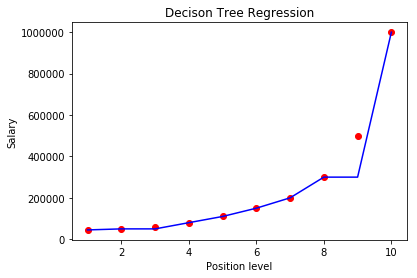

In [18]:
#visualising the Decison Tree Regression result(smoother and bright result)
x_grid=np.arange(min(X), max(X),0.1)
x_grid=x_grid.reshape((len(x_grid),1))

plt.scatter(X,y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title("Decison Tree Regression")
plt.xlabel('Position level')
plt.ylabel("Salary")
plt.show()

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(random_state=0)
regressor1.fit(X,y)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

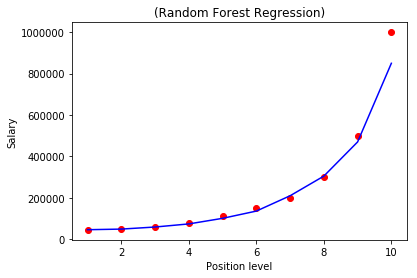

In [20]:
#visualising the Random Forest Regression result
plt.scatter(X,y, color='red')
plt.plot(X, regressor1.predict(X), color='blue')
plt.title("(Random Forest Regression)")
plt.xlabel('Position level')
plt.ylabel("Salary")
plt.show()

In [21]:
y_predict=regressor1.predict([[6.5]])

In [22]:
y_predict

array([167000.])

In [24]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor1, out_file ='tree.dot',feature_names =['Position level'])  


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.